In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Dataset Alternative Fuel Vehicles

In [143]:
df1= pd.read_csv("../Datasets/Alternative Fuel Vehicles US.csv")
pd.set_option('display.max_columns', None)
df1.sample(5)

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
141,SUV,Ioniq 5 RWD,2022.0,Hyundai,Electric,220.0,NaN,127.0,94.0,110.0,NaN,NaN,NaN,Auto,NaN,e-motor,125 kW electric motor,NaN,NaN,NaN,NaN,RWD
525,Sedan/Wagon,Leaf SV/SL (62 kWh battery pack),2021.0,Nissan,Electric,215.0,NaN,114.0,94.0,104.0,NaN,NaN,NaN,Auto,NaN,e-motor,160 kW electric motor,NaN,NaN,NaN,NaN,NaN
85,Van,Pacifica Hybrid,2022.0,Chrysler,Plug-in Hybrid Electric,32.0,520.0,NaN,NaN,82.0,29.0,30.0,30.0,Auto,NaN,SI,3.6L,6.0,NaN,NaN,NaN,FWD
5,Sedan/Wagon,A4 S line quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,24.0,31.0,27.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
410,Pickup,Super Duty F-250 2WD/4WD,2021.0,Ford,CNG - Bi-fuel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auto,NaN,SI,7.3L,8.0,NaN,NaN,Ford offers a “prep package” for this vehicle....,NaN


### Se eliminan columnas inncesarias

In [144]:
df1 = df1.drop(columns={'Transmission Type', 'Transmission Make', 'Number of Passengers','Engine Type', 'Engine Size', 'Engine Cylinder Count',
                        'Heavy-Duty Power System', 'Notes', 'Drivetrain'})

Se normalizan los nombres de cada columna

In [145]:
df1.columns

Index(['Category', 'Model', 'Model Year', 'Manufacturer', 'Fuel',
       'All-Electric Range', 'PHEV Total Range',
       'Alternative Fuel Economy City', 'Alternative Fuel Economy Highway',
       'Alternative Fuel Economy Combined', 'Conventional Fuel Economy City',
       'Conventional Fuel Economy Highway',
       'Conventional Fuel Economy Combined'],
      dtype='object')

Renombramos columnas

In [146]:
df1.rename(columns={'Category':'category', 'Model': 'model', 'Model Year':'model_year', 'Manufacturer':'manufacturer'
    , 'Fuel': 'fuel','All-Electric Range': 'all_electric_range', 'PHEV Total Range':'PHEV_total_range',
       'Alternative Fuel Economy City': 'alternative_fuel_economy_city', 'Alternative Fuel Economy Highway':'alternative_fuel_economy_highway',
       'Alternative Fuel Economy Combined': 'alternative_fuel_economy_combined', 'Conventional Fuel Economy City': 'conventional_fuel_economy_city',
       'Conventional Fuel Economy Highway': 'conventional_fuel_economy_highway',
       'Conventional Fuel Economy Combined': 'conventional_fuel_economy_combined'
    }, inplace = True)

### Se verifica el tipo de dato de cada columna

In [147]:
df1.shape, df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   category                            882 non-null    object 
 1   model                               882 non-null    object 
 2   model_year                          594 non-null    float64
 3   manufacturer                        882 non-null    object 
 4   fuel                                882 non-null    object 
 5   all_electric_range                  222 non-null    float64
 6   PHEV_total_range                    43 non-null     float64
 7   alternative_fuel_economy_city       169 non-null    float64
 8   alternative_fuel_economy_highway    169 non-null    float64
 9   alternative_fuel_economy_combined   262 non-null    float64
 10  conventional_fuel_economy_city      444 non-null    float64
 11  conventional_fuel_economy_highway   444 non-n

((882, 13), None)

Tenemos 882 filas y 13 columnas

Se modifica el tipo de dato de 'Model Year' a entero

In [148]:
df1['model_year'] = df1['model_year'].astype('Int64')

In [149]:
df1.columns

Index(['category', 'model', 'model_year', 'manufacturer', 'fuel',
       'all_electric_range', 'PHEV_total_range',
       'alternative_fuel_economy_city', 'alternative_fuel_economy_highway',
       'alternative_fuel_economy_combined', 'conventional_fuel_economy_city',
       'conventional_fuel_economy_highway',
       'conventional_fuel_economy_combined'],
      dtype='object')

Validamos si hay valores nulos

In [150]:
df1.isna().sum()

category                                0
model                                   0
model_year                            288
manufacturer                            0
fuel                                    0
all_electric_range                    660
PHEV_total_range                      839
alternative_fuel_economy_city         713
alternative_fuel_economy_highway      713
alternative_fuel_economy_combined     620
conventional_fuel_economy_city        438
conventional_fuel_economy_highway     438
conventional_fuel_economy_combined    438
dtype: int64

Hay valores nulos pero se opta por noi borrarlos ya que me afectaria otras columnas que si tienen valor para el analisis

validamos valores duplicados

In [151]:
df1.duplicated().value_counts()

False    880
True       2
Name: count, dtype: int64

hay 2  valores duplicados, se eliminan

In [152]:
df1.drop_duplicates(inplace= True)

### Analisis Descriptivo

In [153]:
df1.describe()

,model_year,all_electric_range,PHEV_total_range,alternative_fuel_economy_city,alternative_fuel_economy_highway,alternative_fuel_economy_combined,conventional_fuel_economy_city,conventional_fuel_economy_highway,conventional_fuel_economy_combined
count,593.0,222.000000,43.000000,169.000000,169.000000,262.000000,443.000000,443.000000,443.000000
mean,2021.539629,165.927928,450.465116,84.585799,77.591716,75.992366,25.907449,30.085779,27.264108
std,0.498848,132.992955,93.042578,39.430696,32.735123,32.303279,10.872066,12.830142,9.814812
min,2021.0,8.000000,290.000000,10.000000,12.000000,11.000000,13.000000,16.000000,15.000000
25%,2021.0,23.000000,380.000000,71.000000,66.000000,56.000000,19.000000,24.000000,21.000000
50%,2022.0,203.000000,460.000000,94.000000,85.000000,76.000000,22.000000,28.000000,24.000000
75%,2022.0,260.000000,520.000000,115.000000,99.000000,101.000000,28.000000,33.000000,30.000000
max,2022.0,520.000000,640.000000,150.000000,133.000000,142.000000,59.000000,231.000000,59.000000


Se quiere conformar un dataset con las categorias de vehiculos que pueden ser utilizados en la flota y su rendimiento.

* La media de autonomia de un vehiculo 100% electrico es de 166 millas.
* La media de autonomia de un vehiculo hibrido enchufable es de 450 millas. 
* La media de autonomia de un vehiculo convencional de combustible es de 443 millas. 

Verificamos que categorias pueden ser usadas en el modelo de negocio

In [154]:
df1['category'].value_counts()

category
Sedan/Wagon                      282
SUV                              222
Pickup                            79
Transit Bus                       76
Vocational/Cab Chassis            68
Passenger Van/Shuttle Bus         46
Van                               23
Street Sweeper                    21
School Bus                        21
Refuse                            16
Tractor                           15
Step Van                           5
TractorVocational/Cab Chassis      4
Vocational/Cab ChassisVan          1
Vocational/Cab ChassisTractor      1
Name: count, dtype: int64

Por tamaño de cantidad de pasajeros solo las categorias : 'Sedan' y 'Suv' son operativas para el negocio
creamos el nuevo dataset

In [155]:
df_categorias = df1.loc[df1['category'].isin(['Sedan/Wagon', 'SUV'])]
df_categorias.head()

,category,model,model_year,manufacturer,fuel,all_electric_range,PHEV_total_range,alternative_fuel_economy_city,alternative_fuel_economy_highway,alternative_fuel_economy_combined,conventional_fuel_economy_city,conventional_fuel_economy_highway,conventional_fuel_economy_combined
0,Sedan/Wagon,NSX,2022,Acura,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,21.0,22.0,21.0
1,Sedan/Wagon,A3,2022,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,29.0,38.0,32.0
2,Sedan/Wagon,A3 quattro,2022,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,28.0,36.0,31.0
3,Sedan/Wagon,A4 allroad quattro,2022,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,24.0,30.0,26.0
4,Sedan/Wagon,A4 quattro,2022,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,26.0,34.0,29.0


In [156]:
df_categorias['fuel'].value_counts()

fuel
Hybrid Electric            254
Electric                   125
Plug-in Hybrid Electric     91
Biodiesel (B20)             22
Hydrogen Fuel Cell          10
Ethanol (E85)                2
Name: count, dtype: int64

Grafico de barras 'Rendimiento en millas por categoria de vehículo'

Text(0.5, 0, 'Categoria')

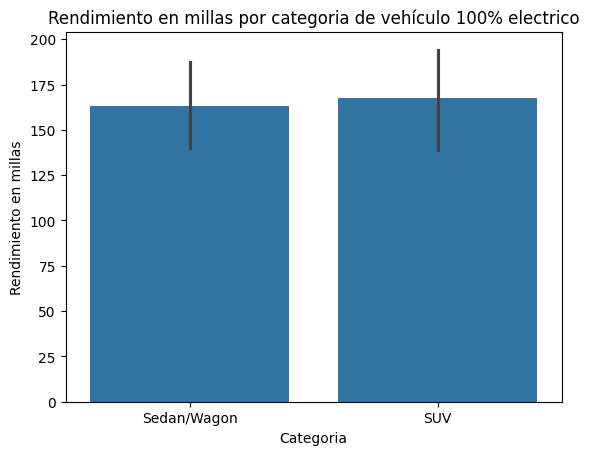

In [157]:
sns.barplot(x = df_categorias['category'] , y = df_categorias['all_electric_range'])
plt.title('Rendimiento en millas por categoria de vehículo 100% electrico')
plt.ylabel(ylabel='Rendimiento en millas')
plt.xlabel(xlabel='Categoria')



Se observa que un Sedan o suv 100% electrico tiene autonomia casi igual

Text(0.5, 0, 'Categoria')

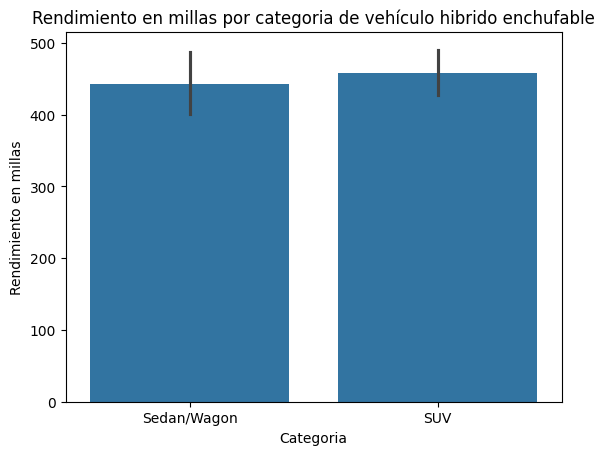

In [158]:
sns.barplot(x = df_categorias['category'] , y = df_categorias['PHEV_total_range'])
plt.title('Rendimiento en millas por categoria de vehículo hibrido enchufable')
plt.ylabel(ylabel='Rendimiento en millas')
plt.xlabel(xlabel='Categoria')

Ambas categorias tienen una autonomia aproximada de 450 millas

Text(0.5, 0, 'Categoria')

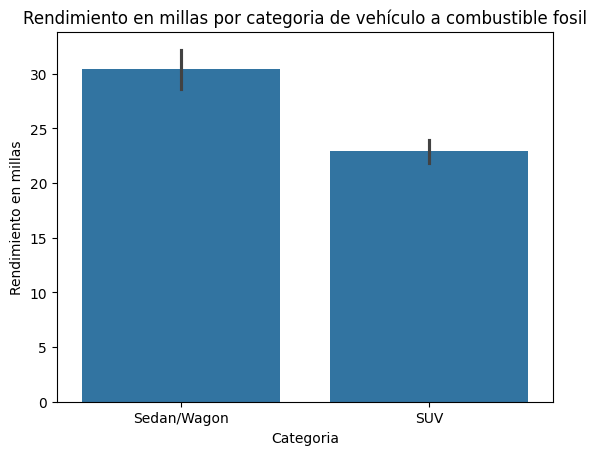

In [159]:
	
sns.barplot(x = df_categorias['category'] , y = df_categorias['conventional_fuel_economy_city'])
plt.title('Rendimiento en millas por categoria de vehículo a combustible fosil')
plt.ylabel(ylabel='Rendimiento en millas')
plt.xlabel(xlabel='Categoria')

El sedan tiene mejor autonomia obviamente por caracteristicas particulares.

### Verificamos Outliers

Text(0, 0.5, 'Rendimiento en millas ')

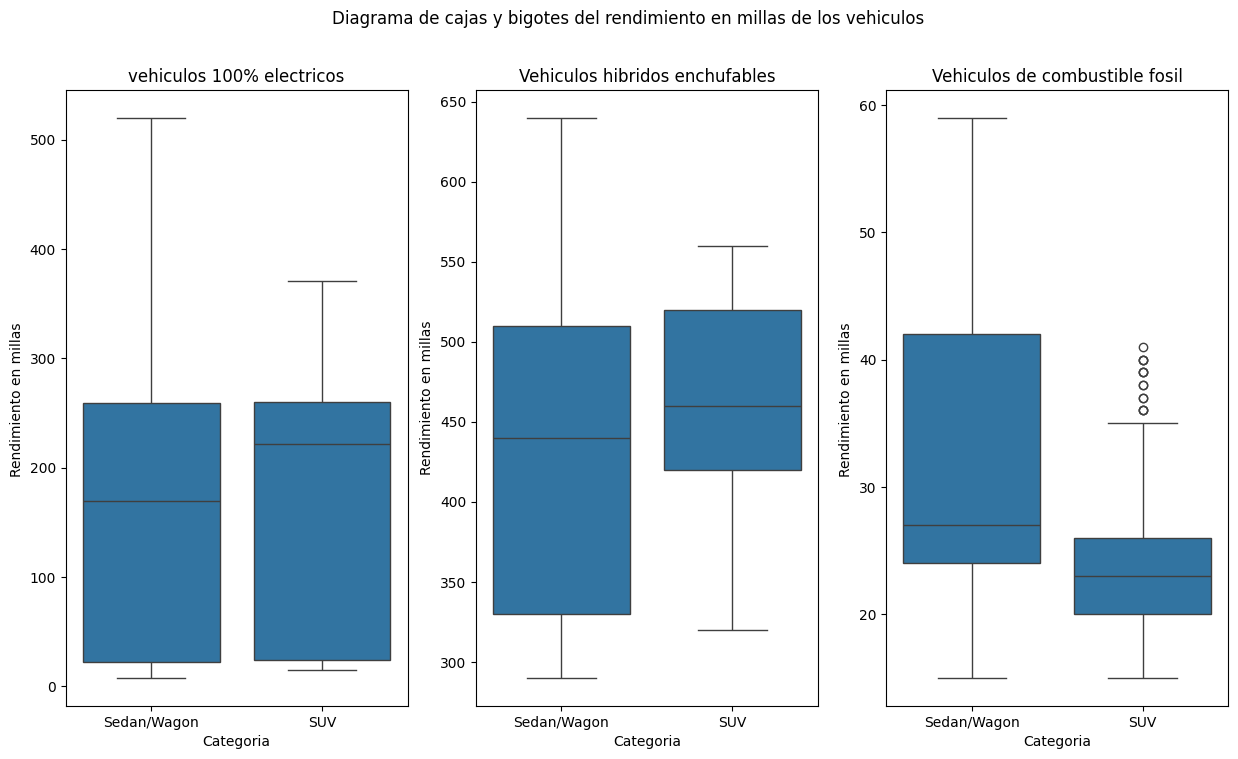

In [172]:
# Se hace el grafico de caja de bigotes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))
sns.boxplot(x = df_categorias.category, y = df_categorias.all_electric_range, ax=axes[0])
plt.suptitle('Diagrama de cajas y bigotes del rendimiento en millas de los vehiculos')
axes[0].set_title('vehiculos 100% electricos')
axes[0].set_xlabel('Categoria')
axes[0].set_ylabel('Rendimiento en millas ')

sns.boxplot(x = df_categorias.category, y = df_categorias.PHEV_total_range, ax=axes[1])
axes[1].set_title('Vehiculos hibridos enchufables')
axes[1].set_xlabel('Categoria')
axes[1].set_ylabel('Rendimiento en millas')

sns.boxplot(x = df_categorias.category, y = df_categorias.conventional_fuel_economy_combined, ax=axes[2])
axes[2].set_title('Vehiculos de combustible fosil')
axes[2].set_xlabel('Categoria')
axes[2].set_ylabel('Rendimiento en millas ')





In [161]:
df_categorias.head(1)

,category,model,model_year,manufacturer,fuel,all_electric_range,PHEV_total_range,alternative_fuel_economy_city,alternative_fuel_economy_highway,alternative_fuel_economy_combined,conventional_fuel_economy_city,conventional_fuel_economy_highway,conventional_fuel_economy_combined
0,Sedan/Wagon,NSX,2022,Acura,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,21.0,22.0,21.0


Se observan valores atipicos para los vehiculos a combustion de fosiles

In [169]:
df_outliers = df_categorias[(df_categorias['category']== 'SUV') & (df_categorias['conventional_fuel_economy_combined'] >36)]
df_outliers

,category,model,model_year,manufacturer,fuel,all_electric_range,PHEV_total_range,alternative_fuel_economy_city,alternative_fuel_economy_highway,alternative_fuel_economy_combined,conventional_fuel_economy_city,conventional_fuel_economy_highway,conventional_fuel_economy_combined
90,SUV,Escape FWD PHEV,2022,Ford,Plug-in Hybrid Electric,37.0,520.0,NaN,NaN,105.0,43.0,38.0,41.0
134,SUV,CR-V AWD,2022,Honda,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,40.0,35.0,38.0
174,SUV,Sorento Hybrid FWD,2022,Kia,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,39.0,35.0,37.0
194,SUV,NX 350h AWD,2022,Lexus,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,41.0,37.0,39.0
297,SUV,RAV4 Hybrid AWD,2022,Toyota,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,41.0,38.0,40.0
303,SUV,Venza AWD,2022,Toyota,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,40.0,37.0,39.0
390,SUV,Escape FWD PHEV,2021,Ford,Plug-in Hybrid Electric,37.0,NaN,NaN,NaN,105.0,43.0,38.0,40.0
438,SUV,CR-V AWD,2021,Honda,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,40.0,35.0,38.0
469,SUV,Sorento Hybrid,2021,Kia,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,39.0,35.0,37.0
578,SUV,RAV4 Hybrid AWD,2021,Toyota,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,41.0,38.0,40.0


### Se calcula el gasto en dolares americanos de cada opcion de vehiculo para determinar si hay mucha diferencia

Carro hibrido

In [163]:
# Automia de 450 km
galones = 13.2
valor_galon = 4.05
cant_kwatts = 20
valor_kwatts = 0.15
gasto_hev = galones* valor_galon + cant_kwatts * valor_kwatts
gasto_hev

56.459999999999994

Carro 100 % electrico

In [164]:
# Automia de 450 km

gasto_ev = valor_kwatts * 450
gasto_ev

67.5

Carro convencional a combustible

In [165]:
# para recorrer 450 millas es necesario 15 galones
gasto_conv = valor_galon * 15
gasto_conv

60.75

Se esporta el dataset Procesado  la carpeta Datasets_procesados

In [166]:
df1.to_csv("../Datasets_procesados/Alternative Fuel Vehicles US.csv")